<a href="https://colab.research.google.com/github/atanilson/Comp702/blob/main/03_pytorch_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Computer Vision

## 0. Computer vision livaries in PyTorch

* `torchvision` - The base PyTorch lybrary for computer vision
* `torchvision.datasets` - get datasets and data loading function
* `torchvision.models` - get pretrained computer vision model that you can leverage for your own problems
* `torchvision.transforms` - functions for manipulating your vision data (images) to be suitable for use with an ML model
* `torch.utils.data.Dataset`- base dataset classs for PyTorch. Create our own data
* `torch.utils.data.DataLoader`- Creates a Python iterable over a dataset

In [ ]:
# Import PyTorch
import torch
from torch import nn

# torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Matplotlib for visualization
import matplotlib.pyplot as plt

#
print(torch.__version__)
print(torchvision.__version__)

2.6.0+cu124
0.21.0+cu124


## 1. Getting a dataset

The dataset we'll be using is  MNIST (handwritten digits) - Hello world of computer vision

The version we will use is FashionMNIST  (PyTorch Datasets)

ImageNet - Gold Standard

In [ ]:
# Setup train data
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root = "data", # where to downlaod tha to
    train=True, # do we want the training dataset
    download=True, # Do we want to downlaod yes/no
    transform=torchvision.transforms.ToTensor(), # how do we want to tranform the data?
    target_transform=None # How do we wanto to transform the labels/targets?
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100%|██████████| 26.4M/26.4M [00:03<00:00, 7.94MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 138kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 2.54MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 6.95MB/s]


In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
# See the first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

## 1.1 Check input and output shapes of data

In [ ]:
# Check the shape of our image
print(f"Image Shape: {image.shape} -> [color_channels, height, width]")
print(f"image label: {class_names[label]}")

Image Shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
image label: Ankle boot


### 1.2 Visualizing our data

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

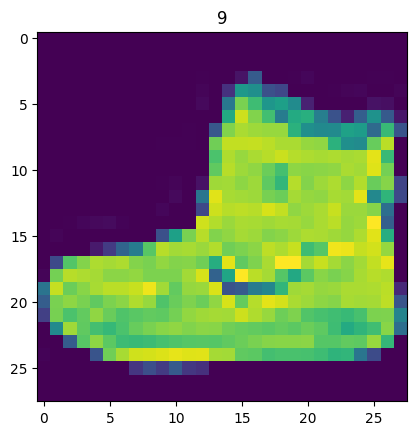

In [ ]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
# image
plt.imshow(image.squeeze())
plt.title(label)

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

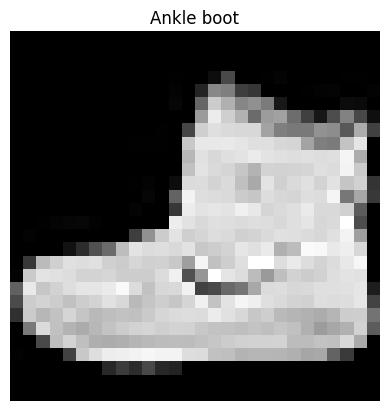

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

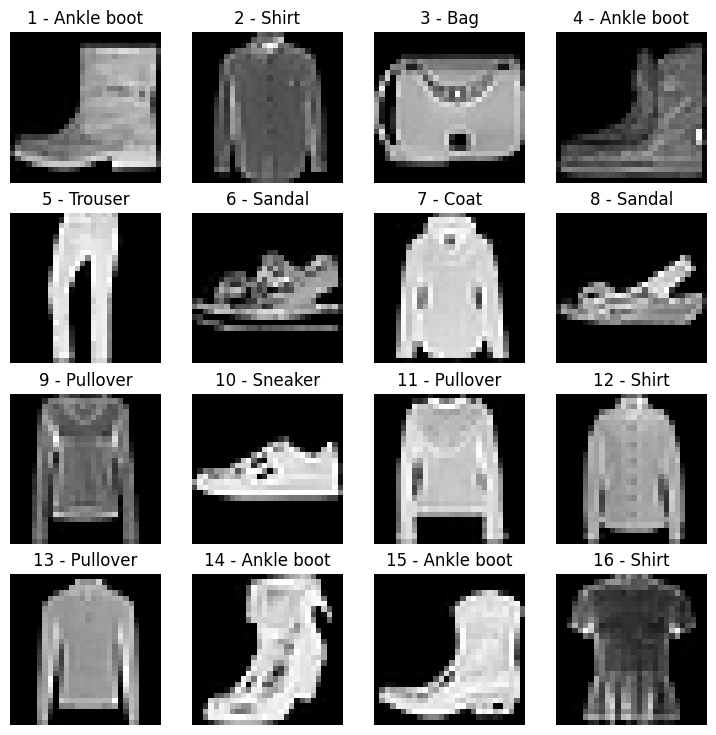

In [ ]:
# Plot mor image
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows,cols = 4,4
for i in range(1, rows*cols+1):
    #print(i)
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    #print(random_idx)
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(f"{i} - {class_names[label]}")
    plt.axis(False)

In [ ]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

## 2. Prepare DataLoader

Right now, our data is in the form of PyTorch Datasets.

DataLoader turns our dataset into a Python iterable

More specifically, we want to turn our data int batches (or mini-baches)

Why
Transform into group of batches
1. It is more computationally efficient, as in, your computing hardware way not be able to look (store in memory) at 60000 images in one hit. So we break it down to 32 images at a time (batch size of 32), is the most common.
2. It gives our neural network more change to update gradient per epoch

In [ ]:
from torch.utils.data import DataLoader

# Setup the natch size hyperparameter
BATCH_SIZE = 32

# Trun dataset into  iterable (batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True
                              )

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False
                             )

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7e954ac59f50>,
 <torch.utils.data.dataloader.DataLoader at 0x7e9548a99910>)

In [ ]:
# Let's check out our dataloader
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train_datalaoder: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test_datalaoder: {len(test_dataloader)} batches of {BATCH_SIZE}")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7e954ac59f50>, <torch.utils.data.dataloader.DataLoader object at 0x7e9548a99910>)
Length of train_datalaoder: 1875 batches of 32
Length of test_datalaoder: 313 batches of 32


In [ ]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


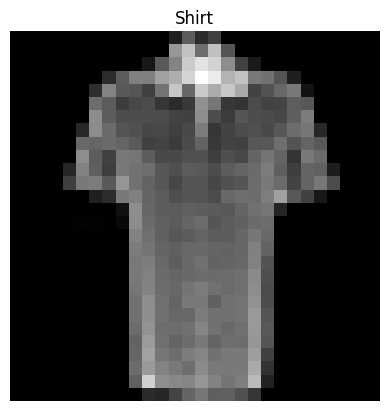

In [ ]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0,len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3. Model 0: Build a baseline model

When starting to build a series of machine learning modelling experiments, it's best practice to start with a baseline model
A baseline model is a simple model you will try to improve upone subsequent models/experiments
In other words: Start simply and add complexit when necessary

In [ ]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatter the sample
output = flatten_model(x) # perform forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape}")
print(f"Shape after flattening: {output.shape}")

Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


In [ ]:
from torch import nn

class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(
    input_shape=28*28,
    hidden_units=19,
    output_shape=len(class_names)
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=19, bias=True)
    (2): Linear(in_features=19, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x)

tensor([[-0.2148, -0.2588,  0.1581,  0.0618, -0.0125, -0.1660,  0.3356, -0.3037,
          0.0445, -0.1701]], grad_fn=<AddmmBackward0>)

In [ ]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [ 0.0214,  0.0289,  0.0107,  ..., -0.0112, -0.0292,  0.0191],
                      [ 0.0170, -0.0162,  0.0170,  ...,  0.0121,  0.0111, -0.0152],
                      [-0.0014,  0.0008, -0.0198,  ...,  0.0154,  0.0030, -0.0313]])),
             ('layer_stack.1.bias',
              tensor([ 0.0080, -0.0075,  0.0190,  0.0320, -0.0128,  0.0006,  0.0293, -0.0061,
                       0.0054, -0.0139,  0.0089, -0.0147, -0.0313, -0.0313,  0.0157, -0.0054,
                       0.0062,  0.0240,  0.0075])),
             ('layer_stack.2.weight',
              tensor([[ 0.2033,  0.0702, -0.2089,  0.1453, -0.2056,  0.1103, -0.0178, -0.2188,
                   

### 3.1 Setup loss, optimizer and evaluation metrics

* Loss function  - Since we're working with mult-class data, our loss fucnton will be `nn.CrossEntropyLoss()`
* Optimizer - `torch.optim.SDG`
Metric Accurecy

In [ ]:
"""
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculater where two tenssors are iqual
    acc = (correct / len(y_pred))*100
    return acc
"""

'\n# Calculate accuracy (a classification metric)\ndef accuracy_fn(y_true, y_pred):\n    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculater where two tenssors are iqual\n    acc = (correct / len(y_pred))*100\n    return acc\n'

In [ ]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
    print("Alread Exist, skipping download..")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
    with open("helper_functions.py","wb") as f:
        f.write(request.content)

In [ ]:
# Import accuracy metric
from helper_functions import accuracy_fn

In [ ]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

### 3.2 CCreatin a function to time our experments

1. Track performance (Loss and accuracy values etc)
2. How fast it runs

In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
    """Print differnece between start and end time."""
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

### 3.3 Creating a training loop and training a model on bashes of data

1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss *per batch*.
3. Loop through testing batches, perform testing steps, calculate test loss *per batch*
4. Print out what's happening.
5, Time it all

In [ ]:
# Import tqdm - for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (We'll keep this small for faster training time)
epochs = 3

# Creat training and test loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-----------------")
    ### Training
    train_loss = 0
    # Add a loop to loop through the training batches
    # (X,y) (Image, label)
    for batch, (X,y) in enumerate(train_dataloader):
        model_0.train()
        # 1. Forward pass
        y_pred = model_0(X)

        # 2. Calculate tloss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumalte train loss

        # 3.Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optmizer Setp / Updata parameter once per batch
        optimizer.step()

        # Print out what's happening
        if batch % 400 == 0:
            print(f"Look at {batch*len(X)}/{len(train_dataloader.dataset)} samples.")

    # Divide total train loss by length of train dataloader
    train_loss /= len(train_dataloader)

    ## Testing
    test_loss, test_acc = 0,0
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            # 1. forward pass
            test_pred = model_0(X_test)

            # 2. Cacluate loss (accumulatetively)
            test_loss += loss_fn(test_pred, y_test)

            # 3. Caclulate accuracy
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

        # Calculate the test loss average per bathc
        test_loss /= len(test_dataloader)

        # Calculate the test acc average per batch
        test_acc /= len(test_dataloader)

    # Print out what's happening
    print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----------------
Look at 0/60000 samples.
Look at 12800/60000 samples.
Look at 25600/60000 samples.
Look at 38400/60000 samples.
Look at 51200/60000 samples.

Train loss: 0.5822 | Test loss: 0.5031, Test acc: 82.3982
Epoch: 1
-----------------
Look at 0/60000 samples.
Look at 12800/60000 samples.
Look at 25600/60000 samples.
Look at 38400/60000 samples.
Look at 51200/60000 samples.

Train loss: 0.4746 | Test loss: 0.4842, Test acc: 82.9772
Epoch: 2
-----------------
Look at 0/60000 samples.
Look at 12800/60000 samples.
Look at 25600/60000 samples.
Look at 38400/60000 samples.
Look at 51200/60000 samples.

Train loss: 0.4540 | Test loss: 0.4770, Test acc: 83.4465
Train time on cpu: 44.908 seconds


## 4. Make prediction and get Model 0 results

In [ ]:
from ast import mod
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader : torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn
               ):
    """Return a dictionary containing the results of model predicting on data_loader."""
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X,y in tqdm(data_loader):
            # Make predictions
            y_pred = model(X)

            # Accumulate the loss and acc value per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                               y_pred=y_pred.argmax(dim=1))

        # Scale loss and acc to find the averege loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name":model.__class__.__name__, # only if the model was created with class model
            "model_loss": loss.item(),
            "model_acc":acc
            }

# Calculated model 0 results on test dataset

model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)

model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47701311111450195,
 'model_acc': 83.4464856230032}

In [ ]:
## 5. Setup divice  agnostic - code (for using GPU)

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

## 6. Model 1: Building a better model with non-linearity

In [ ]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_features:int, hidden_units:int, output_features:int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features),
            #nn.ReLU()
        )

    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [ ]:
next(model_0.parameters()).device

device(type='cpu')

In [ ]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_features=28*28,
                              hidden_units=10,
                              output_features=len(class_names)).to(device)

### 6.1 Setup loss, optmizer and evaluation metric

In [ ]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

### 6.2 Functionizing training and evaluation/testing loops

Let's create a function
* training loop - `train_step()`
* testing loop - `test_step()`

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):

    train_loss, train_acc = 0, 0

    # Put model into training model
    model.train()

    # Add a loop to loop through the training
    for batch, (X, y) in enumerate(data_loader):
        # Put data on target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass (output the raw logit from the model)
        y_pred = model(X)

        # 2. Calculate loss and accuracy (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # go from logits -> predition labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backwards
        loss.backward()

        # 5. Optimizer step (update the model's patameters once *per batch*)
        optimizer.step()

    # Divide total train loss and acc by length of thatin dataloader
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

In [ ]:
def test_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
    """Perform a testing loop step on model going over data_loader."""

    ## Testing
    test_loss, test_acc = 0,0
    model.eval()

    with torch.inference_mode():
        for X_test, y_test in data_loader:
            # Send the data to target device
            X_test, y_test = X_test.to(device), y_test.to(device)

            # 1. forward pass
            test_pred = model(X_test)

            # 2. Cacluate loss (accumulatetively)
            test_loss += loss_fn(test_pred, y_test)

            # 3. Caclulate accuracy
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1)) #-> logit to predition label

        # Calculate the test loss average per bathc
        test_loss /= len(data_loader)

        # Calculate the test acc average per batch
        test_acc /= len(data_loader)

        # Divide total train loss and acc by length of thatin dataloader
        print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}% \n")

In [ ]:
#from threading import Timer
from tqdm.auto import tqdm
from timeit import default_timer as timer

torch.manual_seed(42)
#train_time_start_on_gpu = Timer()
train_time_start_on_gpu = timer()
epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-----------------------------")
    # Train step
    train_step(model=model_1,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device
               )

    # Test Step
    test_step(model=model_1,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               accuracy_fn=accuracy_fn,
               device=device
               )

#train_time_end_on_gpu = Timer()
train_time_end_on_gpu = timer()

total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=next(model_1.parameters()).device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----------------------------
Train loss: 0.64607 | Train acc: 77.17%
Test loss: 0.50167 | Test acc: 82.20% 

Epoch: 1
-----------------------------
Train loss: 0.47965 | Train acc: 82.98%
Test loss: 0.51305 | Test acc: 81.88% 

Epoch: 2
-----------------------------
Train loss: 0.44576 | Train acc: 84.19%
Test loss: 0.44839 | Test acc: 84.32% 

Train time on cpu: 61.060 seconds


> **Note:** Sometimes, depending onyour data/hardware you might find that your model trains faster on CPU than GPU.
> Why is this
> 1. It could be that the overhead for copying data/model to and from GPU outweighs the compute benefits offered by the GPU
> 2. The hardware you're usinf has a better CPU in terms of compute gapability than GPU

In [ ]:
from ast import mod
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader : torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device=device
               ):
    """Return a dictionary containing the results of model predicting on data_loader."""
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X,y in tqdm(data_loader):

            X,y = X.to(device), y.to(device)
            # Make predictions
            y_pred = model(X)

            # Accumulate the loss and acc value per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                               y_pred=y_pred.argmax(dim=1))

        # Scale loss and acc to find the averege loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name":model.__class__.__name__, # only if the model was created with class model
            "model_loss": loss.item(),
            "model_acc":acc
            }


In [ ]:
# Get model_1 results dictionary
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.49976789951324463,
 'model_acc': 83.23682108626198}

## Model 2: Buildind a Convulational Neural Network (CNN or ConvNets)

In [ ]:
# Create a convultional neural network
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture that replicates the TinyVGG
    model from CNN explainer website.
    """
    def __init__(self, input_shape: int, hidden_units:int, output_shape:int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            # Create a convlayer
            nn.Conv2d(in_channels=input_shape, # 2D data hight and width
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1
            ),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1
                      ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7, # There is a trick to calculating that
                      out_features=output_shape)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        #print("Output shape conv block 1",x.shape)
        x=self.conv_block_2(x)
        #print("Output shape conv block 2",x.shape)
        x = self.classifier(x)
        #print("Output shape classifier",x.shape)
        return x

In [ ]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

In [ ]:
model_2(image.unsqueeze(0)).to(device)

tensor([[ 0.0246, -0.0644,  0.0551, -0.0360, -0.0139,  0.0113, -0.0014, -0.0075,
          0.0213,  0.0076]], grad_fn=<AddmmBackward0>)

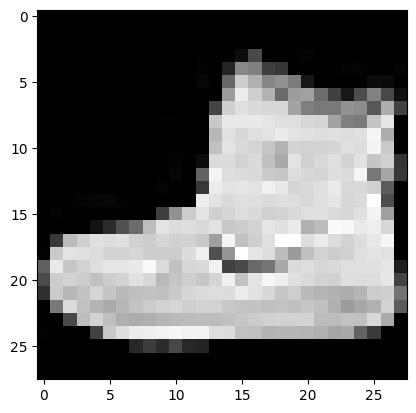

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")

In [ ]:
image.shape

torch.Size([1, 28, 28])

### 7.1 Stepping through `nn.Conv2d`

In [ ]:
torch.manual_seed(42)

# Create a bath of images
images = torch.randn(size=(32,3,64,64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single images shape: {test_image.shape}")
print(f"Test image:\n {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single images shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-

In [ ]:
# Create a Single conv2d layer
conv_layer = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=(3,3), stride=1, padding=1)

# Pass the data through the convolutional layer
conv_output = conv_layer(test_image)

conv_output.shape

torch.Size([10, 64, 64])

## 7.2 Stepping through `nn.MaxPool2d()`

In [ ]:
test_image.shape

torch.Size([3, 64, 64])

In [ ]:
# Print out the original image shape without unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(0).shape}")

# Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_lauer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 64, 64])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 32, 32])


In [ ]:
torch.manual_seed(42)
# Create a random tensor with a similiar number of dimations to our images
random_tensor = torch.randn(size=(1,1,2,2))
print(f"\nRandom Tensor:\n{random_tensor}")
print(f"\nRandom Tensor Shape:\n{random_tensor.shape}")

# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass the random tenspr through the max pool layer
max_pool_tonsor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n {max_pool_tonsor}")
print(f"Max pool tensor shape: {max_pool_tonsor.shape}")


Random Tensor:
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])

Random Tensor Shape:
torch.Size([1, 1, 2, 2])

Max pool tensor:
 tensor([[[[0.3367]]]])
Max pool tensor shape: torch.Size([1, 1, 1, 1])


### 7.3 Setpup a loss function and optimizer for `model_2`

In [ ]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Messure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n------")
    train_step(model=model_2,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    test_step(model=model_2,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)
train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                            end=train_time_end_model_2,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Train loss: 0.59518 | Train acc: 78.38%
Test loss: 0.39500 | Test acc: 85.99% 

Epoch: 1
------
Train loss: 0.36536 | Train acc: 86.90%
Test loss: 0.35244 | Test acc: 86.91% 

Epoch: 2
------
Train loss: 0.32588 | Train acc: 88.13%
Test loss: 0.32719 | Test acc: 88.07% 

Train time on cpu: 199.633 seconds


In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
# Get model_2 results
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)

model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

## 8. Compare model results and training time

In [ ]:
import pandas as pd
compare_results_df = pd.DataFrame([model_0_results,
                                   model_1_results,
                                   model_2_results])
compare_results_df

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.477013,83.446486
1,FashionMNISTModelV1,0.499768,83.236821
2,FashionMNISTModelV2,0.327190,88.069089


In [ ]:
# Add training time to results comparison
compare_results_df["trainin_time"] = [total_train_time_model_0,
                                      total_train_time_model_1,
                                      total_train_time_model_2]
compare_results_df

,model_name,model_loss,model_acc,trainin_time
0,FashionMNISTModelV0,0.477013,83.446486,44.908343
1,FashionMNISTModelV1,0.499768,83.236821,61.060442
2,FashionMNISTModelV2,0.327190,88.069089,199.633141


Text(0, 0.5, 'model')

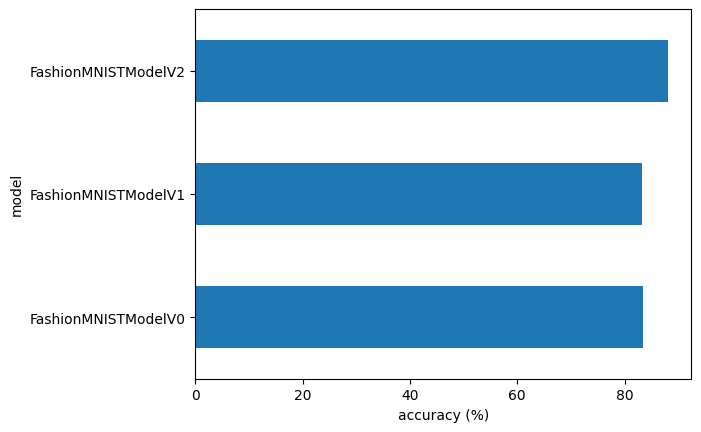

In [ ]:
# Visualize our model results
compare_results_df.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")

## 9. Make and evaluate random predition with best model

In [ ]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     devide: torch.device = device):
    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare the sample (add a batch dimension and pass to target device)
            sample = torch.unsqueeze(sample, dim=0).to(device)

            # Forward pass (model outputs raw logits)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            #pred_labels = torch.argmax(pred_prob)

            # Get pred_prob off the GPU for further calculations
            pred_probs.append(pred_prob.cpu())

    return torch.stack(pred_probs)

In [ ]:
import random
#random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View firt sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Ankle boot')

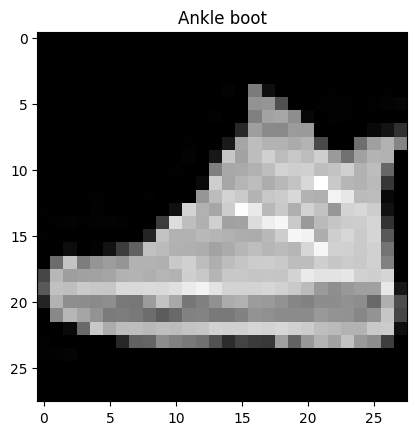

In [ ]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [ ]:
# Make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

# View first two  predition probabilities
pred_probs[:2]

tensor([[9.5317e-06, 2.5895e-06, 1.8420e-05, 1.9412e-04, 2.1242e-05, 1.0020e-03,
         2.1177e-05, 4.9744e-01, 1.8237e-03, 4.9947e-01],
        [4.5719e-05, 9.9867e-01, 1.0388e-06, 1.1472e-03, 9.2417e-05, 4.7290e-06,
         1.7441e-05, 4.9569e-06, 9.4779e-06, 8.2689e-06]])

In [ ]:
# Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([9, 1, 0, 4, 3, 6, 4, 3, 2])

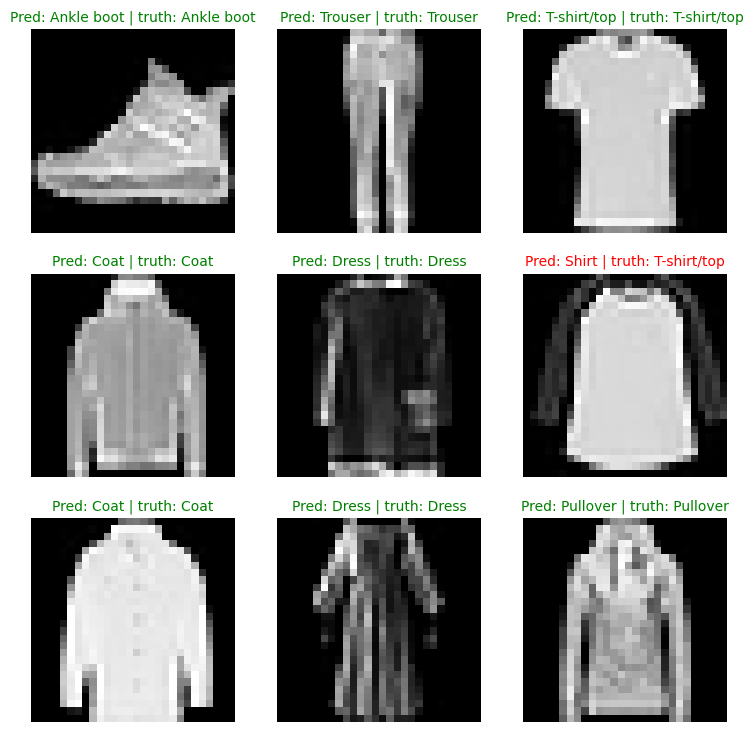

In [ ]:
# Plot predictions
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
    # Create subplot
    plt.subplot(nrows, ncols, i+1)

    # Plot the target image
    plt.imshow(sample.squeeze(), cmap="gray")

    # Find the predition (in text form, e.g "Sandel")
    pred_label = class_names[pred_classes[i]]

    # Get the truth label (in text form)
    truth_label = class_names[test_labels[i]]

    # Create a title for the plot
    title_text = f"Pred: {pred_label} | truth: {truth_label}"

    # Check for equality between pred and truth and change color of title text
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c="g") # Gree text if predition same as truth
    else:
        plt.title(title_text, fontsize=10, c="r")

    plt.axis(False)

## 10. Making a confution Matrix

2 Use `torch.Metrics.confusionMatrix`

3 Plot the Confusion Matix using `mlxtend.plotting.plot_confusion_matrix()`

In [ ]:
from tqdm.auto import tqdm

# 1. Make prediction with trained model

y_preds = []
model_2.eval()
with torch.inference_mode():
    for X,y in tqdm(test_dataloader, desc="Making predictions..."):
        X,y = X.to(device), y.to(device)
        y_logit = model_2(X)
        y_pred =torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
        y_preds.append(y_pred.cpu())

# Concatenate list of  predition into a tensor
#print(y_preds[:10])
y_pred_tensor = torch.cat(y_preds)
len(y_pred_tensor)

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

10000

In [ ]:
import mlxtend

mlxtend.__version__

'0.23.4'

In [ ]:
#See if required packages are installed and if not, intall them

In [ ]:
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) > 19, "mlxtend should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 962.6/962.6 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 64.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 71.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 847.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 87.6 MB/s eta 0:00:00
mlxtend version: 0.23.4


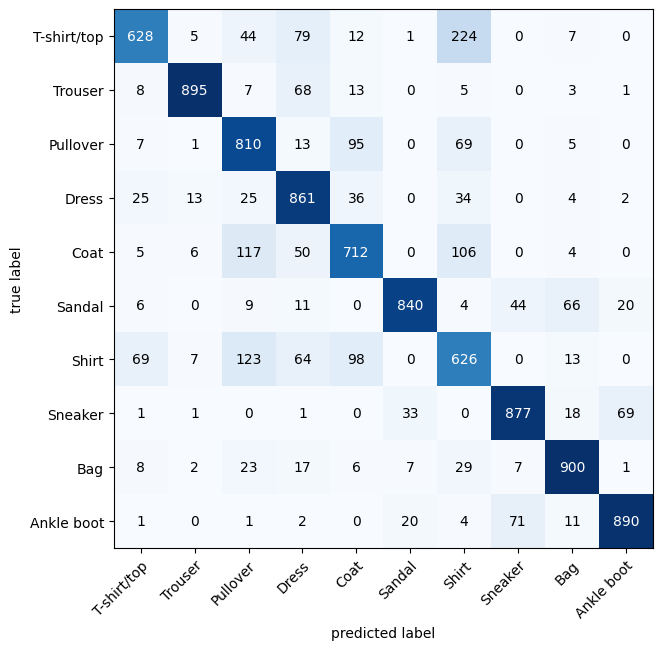

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes = len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)


# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10,7)
)

## 11. Save and laod best performing model

In [ ]:
from pathlib import Path

# Create model dictory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# Create model save path
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

saving model to: models/03_pytorch_computer_vision_model_2.pth


In [ ]:
MODEL_SAVE_PATH

PosixPath('models/03_pytorch_computer_vision_model_2.pth')

In [ ]:
# Create a new instance
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=len(class_names))

# Laod in the save state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

In [ ]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

In [ ]:
# Check if model results are close to each other
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"])
              ) #, atol = 1e-02 # Ajust the tolerance level

tensor(True)